___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
!pip install gensim
!pip install contractions
!pip install autocorrect
!pip install scikit-plot

In [ ]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

In [1]:
import pandas as pd
from gensim.models import Word2Vec
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import nltk.corpus
import sklearn
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import contractions
from autocorrect import Speller
from nltk import NaiveBayesClassifier
from nltk.corpus import wordnet
from nltk import pos_tag
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore");
plt.rcParams["figure.figsize"] = (9,5)
pd.set_option('display.max_columns', 50)

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Data Wrangling

In [3]:
df0 = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df=df0.copy()


In [5]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [6]:
# How many columns are there
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [7]:
# check the shape of the dataset
df.shape

(23486, 11)

In [8]:
# Count the number of unique values in each column
df.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [9]:
# Count the number of nulls in each column
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [10]:
# drop all non values
df.dropna(inplace=True)


In [11]:
# reseat the index after droping some rows
df.reset_index(drop=True, inplace=True)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [12]:
# Check for the missing values after droping the null values
df.isnull().sum()


Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [13]:
# to remove spaces in columns and replace them with underscore
df.columns= df.columns.str.replace(" ", "_")

In [14]:
# How many columns are there
df.columns

Index(['Unnamed:_0', 'Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating',
       'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name',
       'Department_Name', 'Class_Name'],
      dtype='object')

In [15]:
# check the shape of the dataset
df.shape

(19662, 11)

In [16]:
# to remove spaces in columns and replace them with underscore
df.columns= df.columns.str.replace(" ", "_")

In [17]:
# Count the number of unique values in each column
df.nunique()

Unnamed:_0                 19662
Clothing_ID                 1095
Age                           77
Title                      13983
Review_Text                19656
Rating                         5
Recommended_IND                2
Positive_Feedback_Count       79
Division_Name                  3
Department_Name                6
Class_Name                    20
dtype: int64

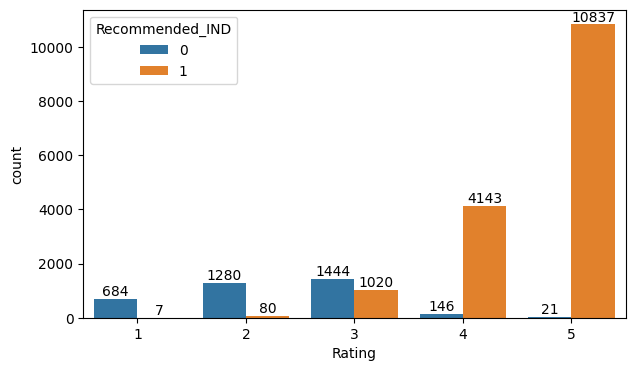

In [18]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating",
                   data=df,
                   hue = "Recommended_IND")
for p in ax.containers:
  ax.bar_label(p)

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

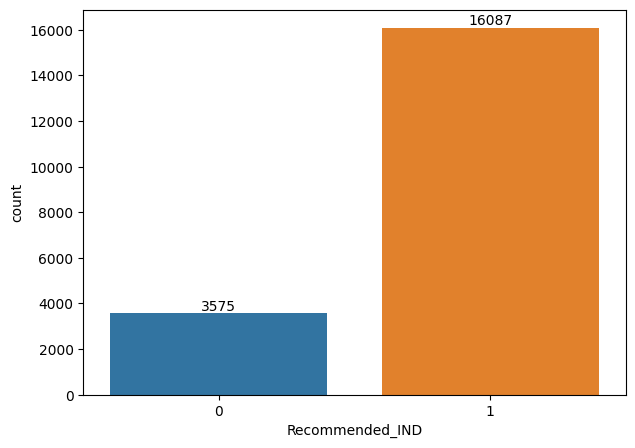

In [19]:
plt.fig = plt.figure(figsize = (7,5))
ax = sns.countplot(x="Recommended_IND",
                   data=df)
ax.bar_label(ax.containers[0]);

In [20]:
df["Recommended_IND"].value_counts(normalize=True)

1    0.818177
0    0.181823
Name: Recommended_IND, dtype: float64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [21]:
# drop unnecessary columns
df=df[["Review_Text", 'Recommended_IND']]
df.head()


,Review_Text,Recommended_IND
0,I had such high hopes for this dress and reall...,0
1,"I love, love, love this jumpsuit. it's fun, fl...",1
2,This shirt is very flattering to all due to th...,1
3,"I love tracy reese dresses, but this one is no...",0
4,I aded this in my basket at hte last mintue to...,1


In [22]:
# Count the number of nulls in each column
df.isna().sum()

Review_Text        0
Recommended_IND    0
dtype: int64

In [23]:
# drop all non values
df.dropna(inplace=True)


In [24]:
# reseat the index after droping some rows
df.reset_index(drop=True, inplace=True)
df.head()

,Review_Text,Recommended_IND
0,I had such high hopes for this dress and reall...,0
1,"I love, love, love this jumpsuit. it's fun, fl...",1
2,This shirt is very flattering to all due to th...,1
3,"I love tracy reese dresses, but this one is no...",0
4,I aded this in my basket at hte last mintue to...,1


In [25]:
# Check for the missing values after droping the null values
df.isnull().sum()


Review_Text        0
Recommended_IND    0
dtype: int64

In [26]:
# Create reviews Tuples  to store the words along the categorys
reviews = []
# go through Recommended IND column and get the category and the index
for (index , category) in enumerate(df.Recommended_IND):
    reviews.append((df.Review_Text[index],category)) # Store the review for spacific index with catogory inside texts array
# Print first 4
reviews[0:4]

[('I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
  0),
 ("I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",
  1),
 ('This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!',
  1),
 ('I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress 

In [27]:
df.head()

,Review_Text,Recommended_IND
0,I had such high hopes for this dress and reall...,0
1,"I love, love, love this jumpsuit. it's fun, fl...",1
2,This shirt is very flattering to all due to th...,1
3,"I love tracy reese dresses, but this one is no...",0
4,I aded this in my basket at hte last mintue to...,1


---
---


### Missing Value Detection

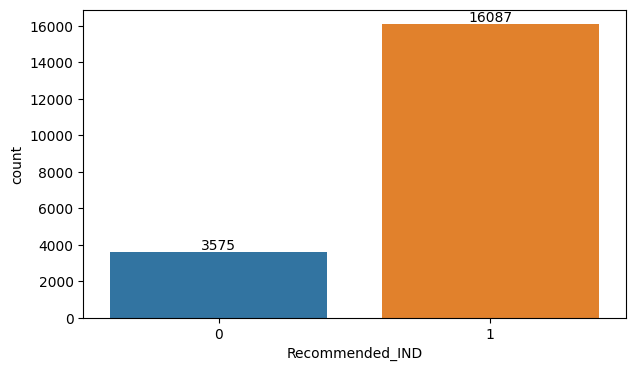

In [28]:
plt.fig = plt.figure(figsize = (7,4))
ax = sns.countplot(x="Recommended_IND",
                   data=df)
ax.bar_label(ax.containers[0]);

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [29]:
stop_words = stopwords.words("english") #(for sentiment analysis, keep no, not)

for i in ["not", "no"]:
  stop_words.remove(i)

In [30]:
def cleaning(data):

    #1. Removing URLS
    # data = re.sub('http\S*', '', data).strip()
    # data = re.sub('www\S*', '', data).strip()

    #2. Removing Tags
    # data = re.sub('#\S*', '', data).strip()

    #3. Removing Mentions
    # data = re.sub('@\S*', '', data).strip()

    # #4. Correction of text
    # spell=Speller(fast=True)
    # correction_data=spell(data)

    #5. Contraction of text
    # contraction_data=contractions.fix(correction_data)
    contraction_data=contractions.fix(data)

    #6. Tokenize and lowercase
    text_tokens = word_tokenize(contraction_data.lower())
    # text_tokens = word_tokenize(correction_data.lower())

    #7. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #8. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #9. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #10. joining
    return " ".join(text_cleaned)

In [31]:
%%time
cleaning_text = df["Review_Text"].apply(cleaning)
cleaning_text.head()

CPU times: total: 29.2 s
Wall time: 29.2 s


0    high hope dress really wanted work initially o...
1    love love love jumpsuit fun flirty fabulous ev...
2    shirt flattering due adjustable front tie perf...
3    love tracy reese dress one not petite foot tal...
4    aded basket hte last mintue see would look lik...
Name: Review_Text, dtype: object

In [32]:
df["cleaning_text"] = cleaning_text

In [33]:
df

,Review_Text,Recommended_IND,cleaning_text
0,I had such high hopes for this dress and reall...,0,high hope dress really wanted work initially o...
1,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
2,This shirt is very flattering to all due to th...,1,shirt flattering due adjustable front tie perf...
3,"I love tracy reese dresses, but this one is no...",0,love tracy reese dress one not petite foot tal...
4,I aded this in my basket at hte last mintue to...,1,aded basket hte last mintue see would look lik...
...,...,...,...
19657,I was very happy to snag this dress at such a ...,1,happy snag dress great price easy slip flatter...
19658,"It reminds me of maternity clothes. soft, stre...",1,reminds maternity clothes soft stretchy shiny ...
19659,"This fit well, but the top was very see throug...",0,fit well top see never would worked glad able ...
19660,I bought this dress for a wedding i have this ...,1,bought dress wedding summer cute unfortunately...


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [34]:
df_cld=df[["cleaning_text", "Recommended_IND"]]

In [35]:
positive_reviews = df_cld[df_cld['Recommended_IND'] == 1]
positive_reviews

,cleaning_text,Recommended_IND
1,love love love jumpsuit fun flirty fabulous ev...,1
2,shirt flattering due adjustable front tie perf...,1
4,aded basket hte last mintue see would look lik...,1
5,ordered carbon store pick ton stuff always try...,1
6,love dress usually get x run little snug bust ...,1
...,...,...
19656,not sure ordering skirt could not see person f...,1
19657,happy snag dress great price easy slip flatter...,1
19658,reminds maternity clothes soft stretchy shiny ...,1
19660,bought dress wedding summer cute unfortunately...,1


In [36]:
negative_reviews = df_cld[df_cld['Recommended_IND'] == 0]
negative_reviews

,cleaning_text,Recommended_IND
0,high hope dress really wanted work initially o...,0
3,love tracy reese dress one not petite foot tal...,0
8,dress run small esp zipper area run ordered sp...,0
19,first not pullover styling side zipper would n...,0
22,loved material not really look long dress purc...,0
...,...,...
19628,really wanted like dress encouraged positive r...,0
19630,tried color really pretty fun want pair pant l...,0
19638,purchased good price typically love maeve fabr...,0
19655,surprised positive review product terrible cut...,0


### Collect Words (positive and negative separately)

In [37]:
recommended_words = ' '.join(positive_reviews['cleaning_text'])

In [38]:
not_recommended_words = ' '.join(negative_reviews['cleaning_text'])

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [39]:
#white background
# # Create word cloud for recommended reviews with white background
# recommended_wordcloud = WordCloud(background_color='white').generate(recommended_words)

# # Create word cloud for not recommended reviews with white background
# not_recommended_wordcloud = WordCloud(background_color='white').generate(not_recommended_words)



# # Create subplots and arrange the word clouds vertically
# fig, axs = plt.subplots(2, 1, figsize=(8, 8))
# axs[0].imshow(recommended_wordcloud, interpolation='bilinear')
# axs[0].axis('off')
# axs[1].imshow(not_recommended_wordcloud, interpolation='bilinear')
# axs[1].axis('off')


# # Add a space or line between the word clouds
# # axs[0].text(0.5, -0.2, '----------------------------------------', transform=axs[0].transAxes, ha='center', color='black', fontsize=12)

# # or
# axs[0].text(0.5, -0.2, '', transform=axs[0].transAxes, ha='center', color='black', fontsize=12)

# plt.tight_layout()
# plt.show()


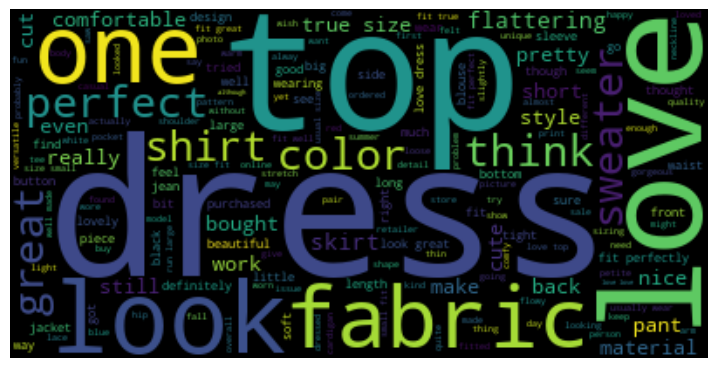

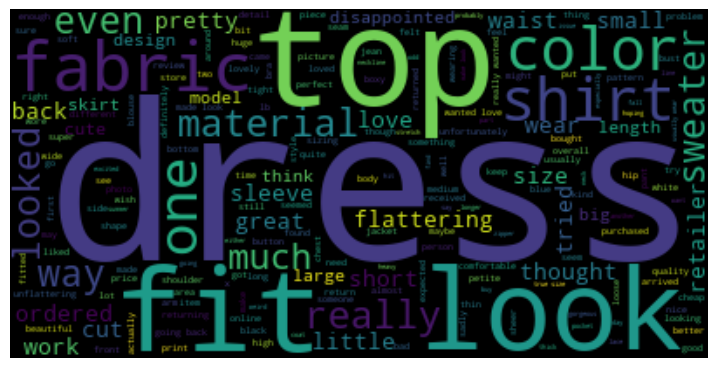

In [40]:
# Create word cloud for recommended reviews
recommended_wordcloud = WordCloud().generate(recommended_words)
plt.imshow(recommended_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Create word cloud for not recommended reviews
not_recommended_wordcloud = WordCloud().generate(not_recommended_words)
plt.imshow(not_recommended_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [41]:
df2=df[["Review_Text", "Recommended_IND"]]

In [42]:
df2.head()

,Review_Text,Recommended_IND
0,I had such high hopes for this dress and reall...,0
1,"I love, love, love this jumpsuit. it's fun, fl...",1
2,This shirt is very flattering to all due to th...,1
3,"I love tracy reese dresses, but this one is no...",0
4,I aded this in my basket at hte last mintue to...,1


In [43]:
X = df2["Review_Text"]
y = df2["Recommended_IND"].map({0:1, 1:0}).values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [45]:
%%time
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # ngram_range=(1,3), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# preprocessor hyper-parametresine yukarıda tanımladığımız cleaning fonksiyonunu vererek temizlik işlemini CountVectorizer
# dönüşüm algortiması içerisinde yaptırabiliyoruz.
# min_df = 3    --> corpusumda 3'den daha az document'da (yorumda) geçen tokenleri ignore et.
# max_df = 1000 --> corpusumda 1000'den daha fazla document'da (yorumda) geçen tokenleri ignore et.

# max_df = 0.95 --> corpusumdaki yorumların en az %95'inde geçen tokenleri ignore et
# min_df olarak 3,4,5 gibi, max_df 0.95 ve üzeri değerler tercih edilebilir.

# max_features = 1500 --> corpusumda en sık kullanılan ilk 1500 feature (tokeni) dikkate al diğerlerini ignore et.

# ngram, textimizdeki kalıpların (isim tamlaması, sıfat tamlaması vb) daha iyi öğrenilmesi için kullanılır.
# "Çok güzel bir TV" yorumu için;
# ngram = 1 olarak tüm tokenler 1'er 1'er ayrışır. Çok, güzel, bir, TV
# ngram = 2 olarak tüm tokenler 2'şer 2'şer ayrışır. Çok güzel, güzel bir, bir TV
# ngram = 3 olarak tüm tokenler 3'er 3'er ayrışır. Çok güzel bir, güzel bir TV
# ngram_range = (1, 3) tüm tokenler ngram 1, 2 ve 3'e göre 1'er 1'er, 2'şer 2'şer ve 3'er 3'er tokenlerine ayrılır
# ngram_range = (1, 4) tüm tokenler ngram 1, 2, 3 ve 4'e göre 1'er 1'er, 2'şer 2'şer, 3'er 3'er ve 4'er 4'er tokenlerine ayrılır

CPU times: total: 26.9 s
Wall time: 26.9 s


In [46]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,abdomen,ability,able,absolute,absolutely,absolutley,abstract,absurd,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessorizing,accessory,accident,accidental,...,yellow,yep,yes,yesterday,yet,yikes,yo,yoga,yoke,young,younger,youthful,yr,yuck,yucky,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16708,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16709,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer

### TF-IDF

In [49]:
%%time
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3, max_df=0.95)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

# preprocessor hyper-parametrese yukarıda tanımladığımız cleaning fonksiyonunu vererek temizlik işlemini TfidfVectorizer
# dönüşüm algortiması içerisinde yaptırabiliyoruz.
# min_df = 3    --> corpusumda 3'den daha az document'da (yorumda) geçen tokenleri ignore et.
# max_df = 1000 --> corpusumda 1000'den daha fazla document'da (yorumda) geçen tokenleri ignore et.

# max_df = 0.95 --> corpusumdaki yorumların en az %95'inde geçen tokenleri ignore et
# min_df olarak 2,3 gibi, max_df 0.95 ve üzeri değerler tercih edilebilir.

# max_features = 1500 --> corpusumda en sık kullanılan ilk 1500 feature (tokeni) dikkate al diğerlerini ignore et.

# ngram, textimizdeki kalıpların (isim tamlaması, sıfat tamlaması vb) daha iyi öğrenilmesi için kullanılır.
# Çok güzel bir TV yorumu için;
# ngram = 1 olarak tüm tokenler 1'er 1'er ayrışır. Çok, güzel, bir, TV
# ngram = 2 olarak tüm tokenler 2'şer 2'şer ayrışır. Çok güzel, güzel bir, bir TV
# bgram = 3 olarak tüm tokenler 3'er 3'er ayrışır. Çok güzel bir, güzel bir TV
# ngram_range = (1, 3) tüm tokenler ngram 1, 2 ve 3'e göre 1'er 1'er, 2'şer 2'şer ve 3'er 3'er tokenlerine ayrılır
# ngram_range = (1, 4) tüm tokenler ngram 1, 2, 3 ve 4'e göre 1'er 1'er, 2'şer 2'şer, 3'er 3'er ve 4'er 4'er tokenlerine ayrılır

CPU times: total: 26.8 s
Wall time: 26.8 s


In [50]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,abdomen,ability,able,absolute,absolutely,absolutley,abstract,absurd,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessorizing,accessory,accident,accidental,...,yellow,yep,yes,yesterday,yet,yikes,yo,yoga,yoke,young,younger,youthful,yr,yuck,yucky,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.146726,0.0,0.0,0.0,0.213628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16707,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16708,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16709,0.0,0.0,0.0,0.398744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16710,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eval Function

In [52]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [53]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import average_precision_score

scoring= ["accuracy", "f1", "recall", "precision"]

In [54]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=["negative"]),
#             'recall-neg': make_scorer(recall_score, average=None, labels = ["negative"]),
#             'f1-neg': make_scorer(f1_score, average=None, labels = ["negative"])}

# model = MultinomialNB(alpha=10)
# scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
# df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores.mean()[2:]

In [55]:
!pip install scikit-plot

In [56]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced', random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [57]:
print("LOG MODEL BALANCED")
eval(log, X_train_count, X_test_count)

LOG MODEL BALANCED
[[2069  345]
 [  73  463]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2414
           1       0.57      0.86      0.69       536

    accuracy                           0.86      2950
   macro avg       0.77      0.86      0.80      2950
weighted avg       0.89      0.86      0.87      2950

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     13673
           1       0.59      0.90      0.71      3039

    accuracy                           0.87     16712
   macro avg       0.78      0.88      0.81     16712
weighted avg       0.90      0.87      0.88     16712



In [58]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

model = LogisticRegression(C = 0.02, max_iter=1000, class_weight= "balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.848193
train_accuracy     0.867813
test_f1            0.668013
train_f1           0.711598
test_recall        0.839751
train_recall       0.896786
test_precision     0.554823
train_precision    0.589807
dtype: float64

In [59]:
# from scikitplot.metrics import plot_roc, plot_precision_recall

# model = LogisticRegression(C = 0.02, max_iter=1000)

# model.fit(X_train_count, y_train)

# y_pred_proba = model.predict_proba(X_test_count)

# plot_precision_recall(y_test, y_pred_proba)
# plt.show();

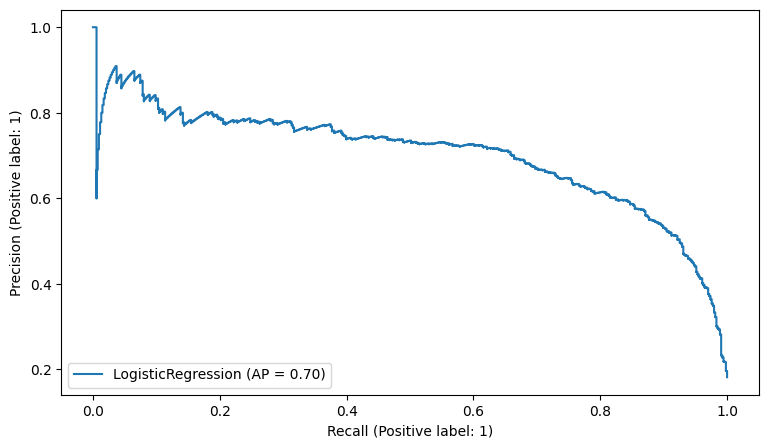

In [60]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(log,
                                      X_test_count,
                                      y_test);

# PrecisionRecallDisplay.from_prediction(y_test, y_pred);

In [61]:
y_pred = log.predict(X_test_count)
y_pred_proba= log.predict_proba(X_test_count)[:,1]

log_count_rec_neg = recall_score(y_test, y_pred)
log_count_f1_neg = f1_score(y_test,y_pred)
log_AP_neg = average_precision_score(y_test, y_pred_proba)

### TF-IDF

In [62]:
log = LogisticRegression(C=0.06, max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000)

In [63]:
print("LOG MODEL BALANCED")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL BALANCED
[[2015  399]
 [  73  463]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      2414
           1       0.54      0.86      0.66       536

    accuracy                           0.84      2950
   macro avg       0.75      0.85      0.78      2950
weighted avg       0.89      0.84      0.85      2950

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     13673
           1       0.55      0.89      0.68      3039

    accuracy                           0.84     16712
   macro avg       0.76      0.86      0.79     16712
weighted avg       0.89      0.84      0.86     16712



In [64]:
model = LogisticRegression(C=0.06, max_iter=1000, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.833174
train_accuracy     0.844503
test_f1            0.650108
train_f1           0.674208
test_recall        0.851919
train_recall       0.884794
test_precision     0.525754
train_precision    0.544593
dtype: float64

In [65]:
# model = LogisticRegression(C=0.02, max_iter=1000)

# model.fit(X_train_tf_idf, y_train)

# y_pred_proba = model.predict_proba(X_test_tf_idf)

# plot_precision_recall(y_test, y_pred_proba)
# plt.show();

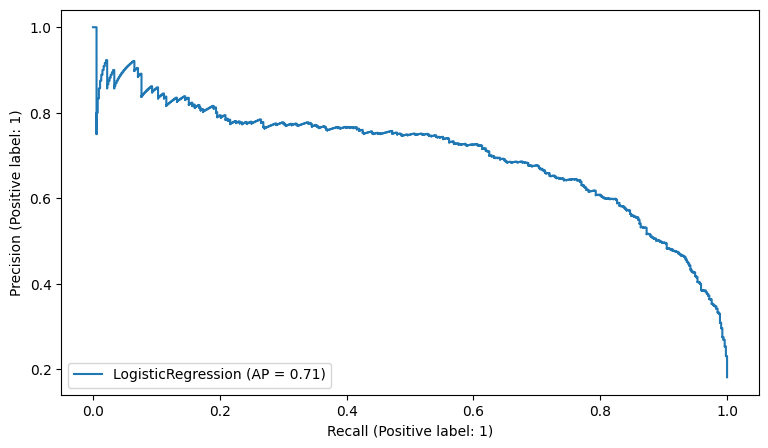

In [66]:
PrecisionRecallDisplay.from_estimator(log,
                                      X_test_tf_idf,
                                      y_test);

In [67]:
# y_pred = log.predict(X_test_tf_idf)
# log_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
# log_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
# log_tfidf_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

In [68]:
y_pred = log.predict(X_test_tf_idf)
y_pred_proba= log.predict_proba(X_test_tf_idf)[:,1]

log_tfidf_rec_neg = recall_score(y_test, y_pred)
log_tfidf_f1_neg = f1_score(y_test,y_pred)
log_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba)

## Naive Bayes


### Countvectorizer

In [69]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = BernoulliNB(alpha=1)  #Alpha arttikca recall cok dustu
nb.fit(X_train_count,y_train)

# Her nekadar multiclass datalar için MultinomialNB, binary datalar için de BernoulliNB tavsiye ediliyor olsa da. Datamızın
# türü ne olursa olsun ikisini de deneyip hangisinde iyi sonuçlar alıyorsak onunla devam edeceğiz.

# Gaussian algortiması NLP dataları için tavsiye edilmez.

# alpha hyper-parametresini overfiting'i kontrol için kullanabiliriz. Ancak alpha değerini çok büyütmek model performansımızı
# bozacağından overfitingi gidermek için sample_weight/class_weight'de kullanabiliriz.

BernoulliNB(alpha=1)

In [70]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[2203  211]
 [ 139  397]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2414
           1       0.65      0.74      0.69       536

    accuracy                           0.88      2950
   macro avg       0.80      0.83      0.81      2950
weighted avg       0.89      0.88      0.88      2950

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     13673
           1       0.68      0.79      0.73      3039

    accuracy                           0.89     16712
   macro avg       0.81      0.85      0.83     16712
weighted avg       0.90      0.89      0.90     16712



In [71]:
model = BernoulliNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.872846
train_accuracy     0.895145
test_f1            0.673778
train_f1           0.731819
test_recall        0.721950
train_recall       0.786735
test_precision     0.631988
train_precision    0.684074
dtype: float64

In [72]:
# model = BernoulliNB(alpha=1)

# model.fit(X_train_count, y_train)

# y_pred_proba = model.predict_proba(X_test_count)

# plot_precision_recall(y_test, y_pred_proba)
# plt.show();

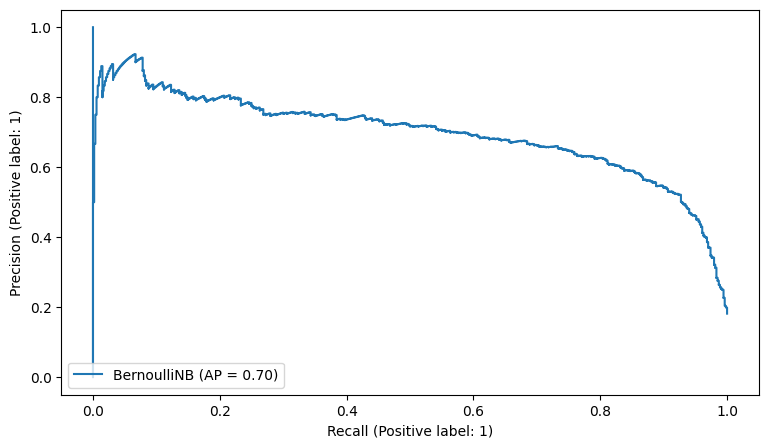

In [73]:
PrecisionRecallDisplay.from_estimator(nb,
                                      X_test_count,
                                      y_test);

In [74]:
pd.get_dummies(y_test)

,0,1
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
2945,0,1
2946,1,0
2947,1,0
2948,1,0


In [75]:
y_pred_proba

array([0.4961485 , 0.21053471, 0.85099806, ..., 0.43103474, 0.49832242,
       0.52425649])

In [76]:
y_pred = nb.predict(X_test_count)
y_pred_proba= nb.predict_proba(X_test_count)[:,1]

nb_count_rec_neg = recall_score(y_test, y_pred)
nb_count_f1_neg = f1_score(y_test,y_pred)
nb_AP_neg = average_precision_score(y_test, y_pred_proba)

In [77]:
# average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

In [79]:
# average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

### TF-IDF

In [80]:
nb = BernoulliNB(alpha=1)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=1)

In [81]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[2203  211]
 [ 139  397]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2414
           1       0.65      0.74      0.69       536

    accuracy                           0.88      2950
   macro avg       0.80      0.83      0.81      2950
weighted avg       0.89      0.88      0.88      2950

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     13673
           1       0.68      0.79      0.73      3039

    accuracy                           0.89     16712
   macro avg       0.81      0.85      0.83     16712
weighted avg       0.90      0.89      0.90     16712



In [82]:
model = BernoulliNB(alpha=1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.872846
train_accuracy     0.895145
test_f1            0.673778
train_f1           0.731819
test_recall        0.721950
train_recall       0.786735
test_precision     0.631988
train_precision    0.684074
dtype: float64

In [83]:
# model = BernoulliNB(alpha=1)

# model.fit(X_train_tf_idf, y_train)

# y_pred_proba = model.predict_proba(X_test_tf_idf)

# plot_precision_recall(y_test, y_pred_proba)
# plt.show();

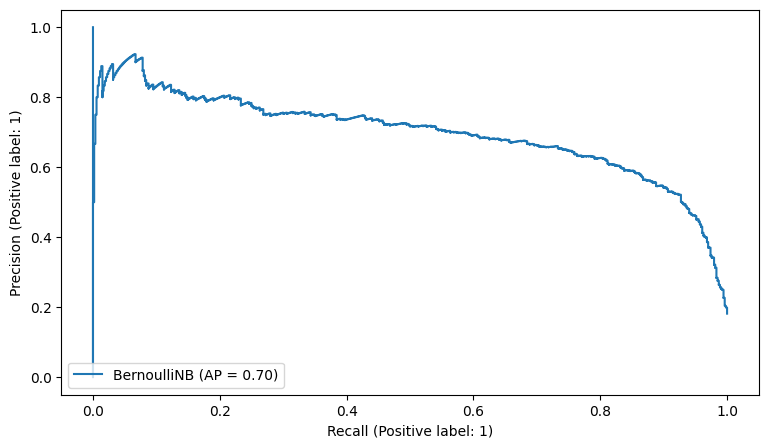

In [84]:
PrecisionRecallDisplay.from_estimator(nb,
                                      X_test_tf_idf,
                                      y_test);

In [85]:
y_pred = nb.predict(X_test_tf_idf)
y_pred_proba= nb.predict_proba(X_test_tf_idf)[:,1]

nb_tfidf_rec_neg = recall_score(y_test, y_pred)
nb_tfidf_f1_neg = f1_score(y_test,y_pred)
nb_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba)

## Support Vector Machine (SVM)



## Countvectorizer

In [86]:
from sklearn.svm import LinearSVC   #import LinearSVC
svc = LinearSVC(C=0.001, class_weight="balanced", random_state=101) #, gamma=0.3, kernel= 'rbf', probability=True, class_weight="balanced") #hedef class 0 oldugu icin balanced dedim, eger 1 olsaydi gerek yoktu
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [87]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[2051  363]
 [  73  463]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      2414
           1       0.56      0.86      0.68       536

    accuracy                           0.85      2950
   macro avg       0.76      0.86      0.79      2950
weighted avg       0.89      0.85      0.86      2950

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     13673
           1       0.57      0.89      0.69      3039

    accuracy                           0.86     16712
   macro avg       0.77      0.87      0.80     16712
weighted avg       0.90      0.86      0.87     16712



In [88]:
model = LinearSVC(C=0.001, class_weight="balanced", random_state=101) #SVC(C=0.1, gamma=0.3, kernel= 'rbf', probability=True, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.839936
train_accuracy     0.855353
test_f1            0.657111
train_f1           0.690485
test_recall        0.843041
train_recall       0.887244
test_precision     0.538617
train_precision    0.565157
dtype: float64

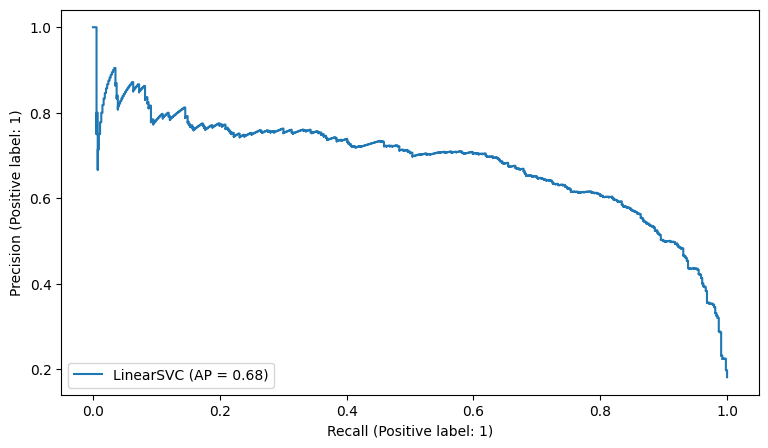

In [89]:
PrecisionRecallDisplay.from_estimator(svc,
                                      X_test_count,
                                      y_test);

In [90]:
svc.decision_function

<bound method LinearClassifierMixin.decision_function of LinearSVC(C=0.001, class_weight='balanced', random_state=101)>

In [91]:
# y_pred = svc.predict(X_test_count)
# decision_function= svc.decision_function(X_test_count)

# svc_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None) #tek bir class oldugu icin(class0) avg a ne dedigin farketmez
# svc_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
# svc_AP_neg = average_precision_score(y_test_dummies[0], decision_function[:, 0])

In [92]:
y_pred = svc.predict(X_test_count)
decision_function= svc.decision_function(X_test_count)

svc_AP_neg = average_precision_score(y_test, decision_function)
svc_count_rec_neg = recall_score(y_test, y_pred)
svc_count_f1_neg = f1_score(y_test,y_pred)

### TF-IDF

In [93]:
svc = LinearSVC(C=0.03, class_weight="balanced", random_state=101) #SVC(C=0.1, gamma=0.3, kernel= 'rbf', probability=True, class_weight="balanced")
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [94]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[2067  347]
 [  64  472]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2414
           1       0.58      0.88      0.70       536

    accuracy                           0.86      2950
   macro avg       0.77      0.87      0.80      2950
weighted avg       0.90      0.86      0.87      2950

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     13673
           1       0.59      0.92      0.72      3039

    accuracy                           0.87     16712
   macro avg       0.79      0.89      0.82     16712
weighted avg       0.91      0.87      0.88     16712



In [95]:
model = LinearSVC(C=0.03, class_weight="balanced", random_state=101) #SVC(C=0.1, gamma=0.3, kernel= 'rbf', probability=True, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.850287
train_accuracy     0.870306
test_f1            0.676270
train_f1           0.720117
test_recall        0.859495
train_recall       0.917517
test_precision     0.557680
train_precision    0.592620
dtype: float64

In [96]:
# from scikitplot.metrics import plot_roc, plot_precision_recall

# model = LinearSVC(C=0.1, class_weight="balanced") #SVC(C=0.1, gamma=0.3, kernel= 'rbf', probability=True, class_weight="balanced")

# model.fit(X_train_tf_idf, y_train)

# decision_function = model.decision_function(X_test_tf_idf)

# plot_precision_recall(y_test, decision_function)
# plt.show();

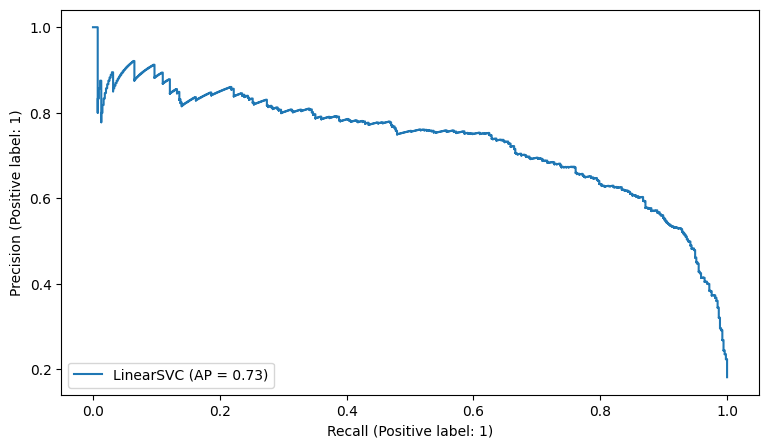

In [97]:
PrecisionRecallDisplay.from_estimator(svc,
                                      X_test_tf_idf,
                                      y_test);

In [98]:
y_pred = svc.predict(X_test_tf_idf)
decision_function= svc.decision_function(X_test_tf_idf)

svc_tfidf_rec_neg = recall_score(y_test, y_pred)
svc_tfidf_f1_neg = f1_score(y_test,y_pred)
svc_tfidf_AP_neg = average_precision_score(y_test, decision_function)

## Random Forest

### Countvectorizer

In [99]:
rf = RandomForestClassifier(100, max_depth = 7, random_state = 42, n_jobs = -1, class_weight="balanced") # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [100]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1964  450]
 [  96  440]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.81      0.88      2414
           1       0.49      0.82      0.62       536

    accuracy                           0.81      2950
   macro avg       0.72      0.82      0.75      2950
weighted avg       0.87      0.81      0.83      2950

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     13673
           1       0.54      0.87      0.66      3039

    accuracy                           0.84     16712
   macro avg       0.75      0.85      0.78     16712
weighted avg       0.89      0.84      0.85     16712



In [101]:
model = RandomForestClassifier(100, max_depth = 7, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.816359
train_accuracy     0.843559
test_f1            0.614639
train_f1           0.670530
test_recall        0.805195
train_recall       0.875032
test_precision     0.497064
train_precision    0.543648
dtype: float64

In [102]:
# from scikitplot.metrics import plot_roc, plot_precision_recall

# model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)

# model.fit(X_train_count, y_train)

# y_pred_proba = model.predict_proba(X_test_count)

# plot_precision_recall(y_test, y_pred_proba)
# plt.show();

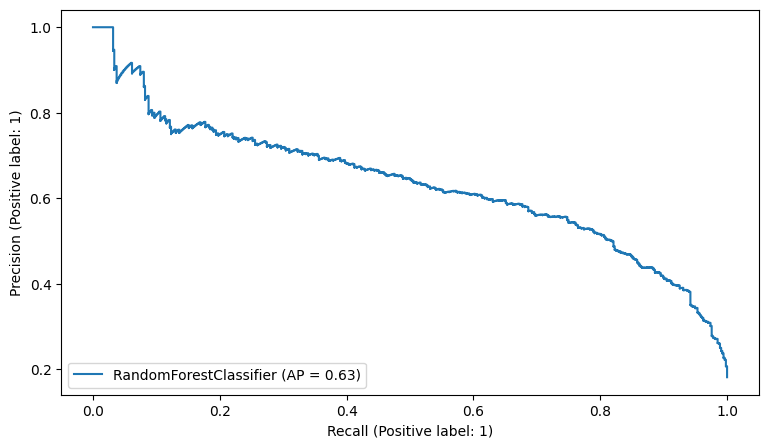

In [103]:
PrecisionRecallDisplay.from_estimator(rf,
                                      X_test_count,
                                      y_test);

In [104]:
y_pred = rf.predict(X_test_count)
y_pred_proba= rf.predict_proba(X_test_count)[:,1]

rf_count_rec_neg = recall_score(y_test, y_pred)
rf_count_f1_neg = f1_score(y_test,y_pred)
rf_AP_neg = average_precision_score(y_test, y_pred_proba)

### TF-IDF

In [105]:
rf = RandomForestClassifier(100, max_depth=7, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [106]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1949  465]
 [  99  437]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.81      0.87      2414
           1       0.48      0.82      0.61       536

    accuracy                           0.81      2950
   macro avg       0.72      0.81      0.74      2950
weighted avg       0.87      0.81      0.83      2950

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     13673
           1       0.53      0.88      0.66      3039

    accuracy                           0.84     16712
   macro avg       0.75      0.86      0.78     16712
weighted avg       0.89      0.84      0.85     16712



In [107]:
model = RandomForestClassifier(100, max_depth=7, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.803974
train_accuracy     0.834510
test_f1            0.600420
train_f1           0.661940
test_recall        0.809146
train_recall       0.890607
test_precision     0.477632
train_precision    0.526789
dtype: float64

In [108]:
# model = RandomForestClassifier(100, max_depth=7, random_state = 42, n_jobs = -1, class_weight="balanced")

# model.fit(X_train_tf_idf, y_train)

# y_pred_proba = model.predict_proba(X_test_tf_idf)

# plot_precision_recall(y_test, y_pred_proba)
# plt.show();

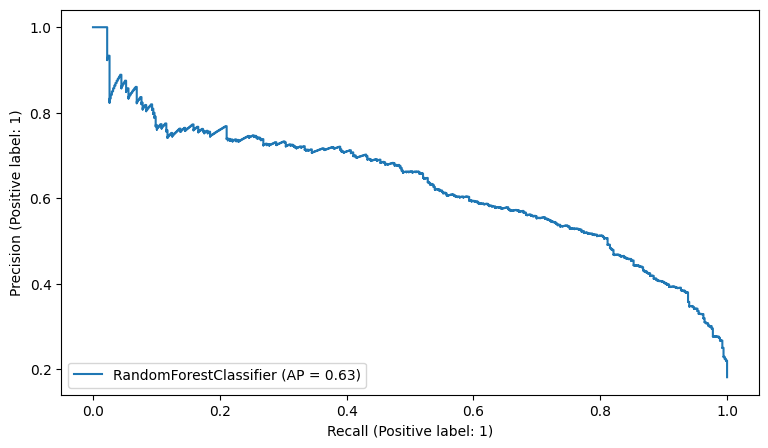

In [109]:
PrecisionRecallDisplay.from_estimator(rf,
                                      X_test_tf_idf,
                                      y_test);

In [110]:
y_pred = rf.predict(X_test_tf_idf)
y_pred_proba= rf.predict_proba(X_test_tf_idf)[:,1]

rf_tfidf_rec_neg = recall_score(y_test, y_pred)
rf_tfidf_f1_neg = f1_score(y_test,y_pred)
rf_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba)

## Ada Boosting

### Countvectorizer

In [111]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 100, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [112]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[2296  118]
 [ 258  278]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2414
           1       0.70      0.52      0.60       536

    accuracy                           0.87      2950
   macro avg       0.80      0.73      0.76      2950
weighted avg       0.86      0.87      0.86      2950

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     13673
           1       0.72      0.52      0.61      3039

    accuracy                           0.88     16712
   macro avg       0.81      0.74      0.77     16712
weighted avg       0.87      0.88      0.87     16712



In [113]:
model = AdaBoostClassifier(n_estimators= 100, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.869315
train_accuracy     0.875824
test_f1            0.582156
train_f1           0.604343
test_recall        0.501157
train_recall       0.521553
test_precision     0.695471
train_precision    0.718429
dtype: float64

In [114]:
# model = AdaBoostClassifier(n_estimators= 500, random_state = 42)

# model.fit(X_train_count, y_train)

# y_pred_proba = model.predict_proba(X_test_count)

# plot_precision_recall(y_test, y_pred_proba)
# plt.show();

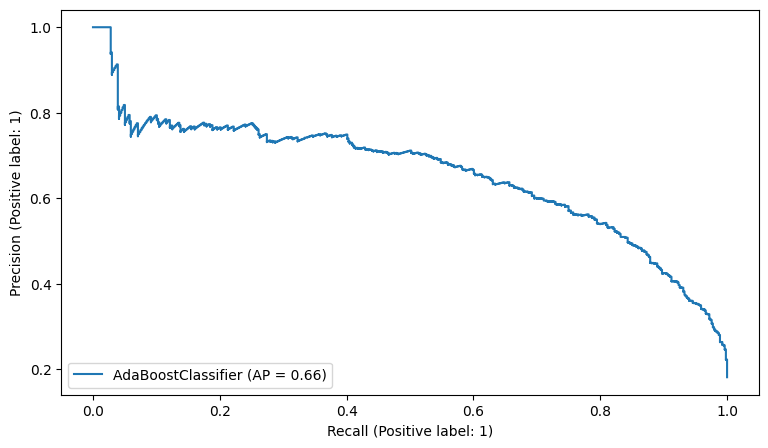

In [115]:
PrecisionRecallDisplay.from_estimator(ada,
                                      X_test_count,
                                      y_test);

In [116]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_count_rec_neg = recall_score(y_test, y_pred)
ada_count_f1_neg = f1_score(y_test,y_pred)
ada_AP_neg = average_precision_score(y_test, y_pred_proba)

### TF-IDF

In [117]:
ada = AdaBoostClassifier(n_estimators= 100, random_state = 42, learning_rate=0.7)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=100, random_state=42)

In [118]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[2318   96]
 [ 305  231]]
Test_Set
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2414
           1       0.71      0.43      0.54       536

    accuracy                           0.86      2950
   macro avg       0.80      0.70      0.73      2950
weighted avg       0.85      0.86      0.85      2950

Train_Set
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     13673
           1       0.75      0.45      0.57      3039

    accuracy                           0.87     16712
   macro avg       0.82      0.71      0.75     16712
weighted avg       0.86      0.87      0.86     16712



In [119]:
model = AdaBoostClassifier(n_estimators= 100, random_state = 42, learning_rate=0.7)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.864589
train_accuracy     0.876303
test_f1            0.537734
train_f1           0.577985
test_recall        0.433035
train_recall       0.465833
test_precision     0.710689
train_precision    0.761298
dtype: float64

In [120]:
# model = AdaBoostClassifier(n_estimators= 100, random_state = 42)

# model.fit(X_train_tf_idf, y_train)

# y_pred_proba = model.predict_proba(X_test_tf_idf)

# plot_precision_recall(y_test, y_pred_proba)
# plt.show();

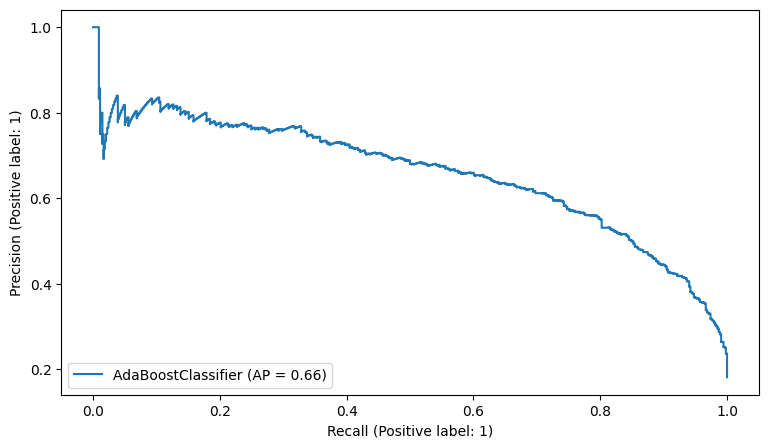

In [121]:
PrecisionRecallDisplay.from_estimator(ada,
                                      X_test_tf_idf,
                                      y_test);

In [122]:
y_pred = ada.predict(X_test_tf_idf)
y_pred_proba= ada.predict_proba(X_test_tf_idf)[:,1]

ada_tfidf_rec_neg = recall_score(y_test, y_pred)
ada_tfidf_f1_neg = f1_score(y_test,y_pred)
ada_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba)

In [123]:
nb_AP_neg

0.6970486100575752

## Compare Scoring

In [124]:
# compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
#                                   "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
#                                   "Random Forest_tfidf", "AdaBoost_tfidf"],

#                         "F1_Score_Negative": [nb_count_f1_neg[0], log_count_f1_neg[0], svc_count_f1_neg[0],
#                                              rf_count_f1_neg[0], ada_count_f1_neg[0], nb_tfidf_f1_neg[0], log_tfidf_f1_neg[0],
#                                              svc_tfidf_f1_neg[0], rf_tfidf_f1_neg[0], ada_tfidf_f1_neg[0]],

#                         "Recall_Score_Negative": [nb_count_rec_neg[0], log_count_rec_neg[0], svc_count_rec_neg[0],
#                                                  rf_count_rec_neg[0], ada_count_rec_neg[0],
#                                                   nb_tfidf_rec_neg[0], log_tfidf_rec_neg[0], svc_tfidf_rec_neg[0],
#                                                   rf_tfidf_rec_neg[0], ada_tfidf_rec_neg[0]]})

#                         # "Average_Precision_Score_Negative": [nb_AP_neg, log_AP_neg, svc_AP_neg,  rf_AP_neg,
#                         #                                   ada_AP_neg, nb_tfidf_AP_neg, log_tfidf_AP_neg, svc_tfidf_AP_neg,
#                         #                                     rf_tfidf_AP_neg, ada_tfidf_AP_neg]})

# compare

In [125]:
# plt.figure(figsize=(15,30))
# plt.subplot(311)
# compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
# ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
# ax.bar_label(ax.containers[0], fmt="%.3f")

# plt.subplot(312)
# compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
# ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
# ax.bar_label(ax.containers[0],fmt="%.3f")


# plt.subplot(313)
# compare = compare.sort_values(by="Average_Precision_Score_Negative", ascending=False)
# ax=sns.barplot(x="Average_Precision_Score_Negative", y="Model", data=compare, palette="Blues_d")
# ax.bar_label(ax.containers[0],fmt="%.3f")
# plt.show();

# hernekadar RF ve NB recall scorları daha yüksek olsa da F1 scorları daha düşük buda bize bu modellerin precision
# scorlarının logreg veya SVM'ye nispeten daha düşük olduğunu gösterir.

# Bizim için tekbaşıan recall'un çok yüksek olması önemli değil. Recall ile birlikte precisionın da olabildiğince yüksek
# olması gerekli. Bu sebeple logreg tf-idf ile devam edeceğiz.

## DL modeling

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [127]:
df

,Review_Text,Recommended_IND,cleaning_text
0,I had such high hopes for this dress and reall...,0,high hope dress really wanted work initially o...
1,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
2,This shirt is very flattering to all due to th...,1,shirt flattering due adjustable front tie perf...
3,"I love tracy reese dresses, but this one is no...",0,love tracy reese dress one not petite foot tal...
4,I aded this in my basket at hte last mintue to...,1,aded basket hte last mintue see would look lik...
...,...,...,...
19657,I was very happy to snag this dress at such a ...,1,happy snag dress great price easy slip flatter...
19658,"It reminds me of maternity clothes. soft, stre...",1,reminds maternity clothes soft stretchy shiny ...
19659,"This fit well, but the top was very see throug...",0,fit well top see never would worked glad able ...
19660,I bought this dress for a wedding i have this ...,1,bought dress wedding summer cute unfortunately...


In [128]:
df.Review_Text=df.Review_Text.apply(lambda x: contractions.fix(x))

In [129]:
df

,Review_Text,Recommended_IND,cleaning_text
0,I had such high hopes for this dress and reall...,0,high hope dress really wanted work initially o...
1,"I love, love, love this jumpsuit. it is fun, f...",1,love love love jumpsuit fun flirty fabulous ev...
2,This shirt is very flattering to all due to th...,1,shirt flattering due adjustable front tie perf...
3,"I love tracy reese dresses, but this one is no...",0,love tracy reese dress one not petite foot tal...
4,I aded this in my basket at hte last mintue to...,1,aded basket hte last mintue see would look lik...
...,...,...,...
19657,I was very happy to snag this dress at such a ...,1,happy snag dress great price easy slip flatter...
19658,"It reminds me of maternity clothes. soft, stre...",1,reminds maternity clothes soft stretchy shiny ...
19659,"This fit well, but the top was very see throug...",0,fit well top see never would worked glad able ...
19660,I bought this dress for a wedding i have this ...,1,bought dress wedding summer cute unfortunately...


In [130]:
X = df['Review_Text']
y = df['Recommended_IND'].map({1:0, 0:1})

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=101)

### Tokenization

In [132]:
num_words = 15001
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

In [133]:
tokenizer.fit_on_texts(X_train)

### Creating word index

In [134]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'it': 3,
 'and': 4,
 'a': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'not': 10,
 'but': 11,
 'on': 12,
 'for': 13,
 'of': 14,
 'was': 15,
 'with': 16,
 'so': 17,
 'am': 18,
 'my': 19,
 'dress': 20,
 'that': 21,
 'have': 22,
 'size': 23,
 'love': 24,
 'very': 25,
 'are': 26,
 'top': 27,
 'fit': 28,
 'like': 29,
 'be': 30,
 'as': 31,
 'me': 32,
 'wear': 33,
 'would': 34,
 'too': 35,
 'great': 36,
 'or': 37,
 'you': 38,
 'just': 39,
 'they': 40,
 'at': 41,
 'up': 42,
 'fabric': 43,
 'small': 44,
 'color': 45,
 'will': 46,
 'look': 47,
 'if': 48,
 'really': 49,
 'more': 50,
 'ordered': 51,
 'perfect': 52,
 'little': 53,
 'one': 54,
 'these': 55,
 'did': 56,
 'flattering': 57,
 'an': 58,
 'do': 59,
 'well': 60,
 'out': 61,
 'soft': 62,
 'because': 63,
 'back': 64,
 'had': 65,
 '\r': 66,
 'can': 67,
 'bought': 68,
 'comfortable': 69,
 'nice': 70,
 'cute': 71,
 'when': 72,
 'all': 73,
 'than': 74,
 'bit': 75,
 'looks': 76,
 'fits': 77,
 'which': 78,
 'down': 79,
 'beau

In [135]:
len(tokenizer.word_index)

13471

### Converting tokens to numeric

In [136]:
X_train_num_tokens = tokenizer.texts_to_sequences(X_train)
X_test_num_tokens = tokenizer.texts_to_sequences(X_test)

### Maximum number of tokens for all documents¶

In [137]:
num_tokens = [len(tokens) for tokens in X_train_num_tokens]
num_tokens = np.array(num_tokens)

In [138]:
num_tokens.max()

118

In [139]:
max_tokens = 118

In [140]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [141]:
X_train_pad = pad_sequences(X_train_num_tokens, maxlen=max_tokens, padding="pre")
X_test_pad = pad_sequences(X_test_num_tokens, maxlen=max_tokens, padding="pre")

In [142]:
display(X_train_pad.shape)
display(X_test_pad.shape)

(17695, 118)

(1967, 118)

### Train Set Split

### Modeling

In [143]:
model = Sequential()

In [144]:
embedding_size = 50

In [145]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [146]:
optimizer = Adam(learning_rate=0.001)

In [147]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [148]:
model.summary()

# embedding_size * num_words ==> 50 * 15001 = 750050

# 3 x (n2 + nm + 2n) m= input, n= output
# (50*50 + 50*50 + 2*50)*3 = 15.300 ==> m = 50, n = 50
# (25*25 + 50*25 + 2*25)*3 = 5775   ==> m = 50, n = 25
# (12*12 + 25*12 + 2*12)*3 = 1404   ==> m = 24, n = 12
# 12*1 + 1 = 13

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 118, 50)           750050    
                                                                 
 dropout (Dropout)           (None, 118, 50)           0         
                                                                 
 gru (GRU)                   (None, 118, 50)           15300     
                                                                 
 dropout_1 (Dropout)         (None, 118, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 118, 25)           5775      
                                                                 
 dropout_2 (Dropout)         (None, 118, 25)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [149]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience = 2,
                           restore_best_weights=True)

In [150]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train)
pd.Series(classes_weights).unique()

array([0.6110996 , 2.75023314])

In [151]:
model.fit(X_train_pad,
          y_train,
          epochs=10,
          batch_size=128,
          sample_weight=classes_weights,
          validation_data=(X_test_pad, y_test),
          callbacks=[early_stop])

Epoch 1/10
139/139 [==============================] - 40s 233ms/step - loss: 0.5374 - recall: 0.7311 - val_loss: 0.3024 - val_recall: 0.8520
Epoch 2/10
139/139 [==============================] - 30s 217ms/step - loss: 0.3184 - recall: 0.8974 - val_loss: 0.2684 - val_recall: 0.8492
Epoch 3/10
139/139 [==============================] - 30s 216ms/step - loss: 0.2500 - recall: 0.9294 - val_loss: 0.2955 - val_recall: 0.8659
Epoch 4/10
139/139 [==============================] - 30s 217ms/step - loss: 0.2032 - recall: 0.9543 - val_loss: 0.3402 - val_recall: 0.8883
Epoch 5/10
139/139 [==============================] - 30s 216ms/step - loss: 0.1734 - recall: 0.9608 - val_loss: 0.3041 - val_recall: 0.8324
Epoch 6/10
139/139 [==============================] - 30s 218ms/step - loss: 0.1515 - recall: 0.9686 - val_loss: 0.3395 - val_recall: 0.7291
Epoch 6: early stopping


### Model Evaluation

In [152]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.537386,0.731116,0.302438,0.851955
1,0.318447,0.897420,0.268440,0.849162
2,0.250049,0.929437,0.295456,0.865922
3,0.203200,0.954305,0.340222,0.888268
4,0.173382,0.960833,0.304127,0.832402


<Axes: >

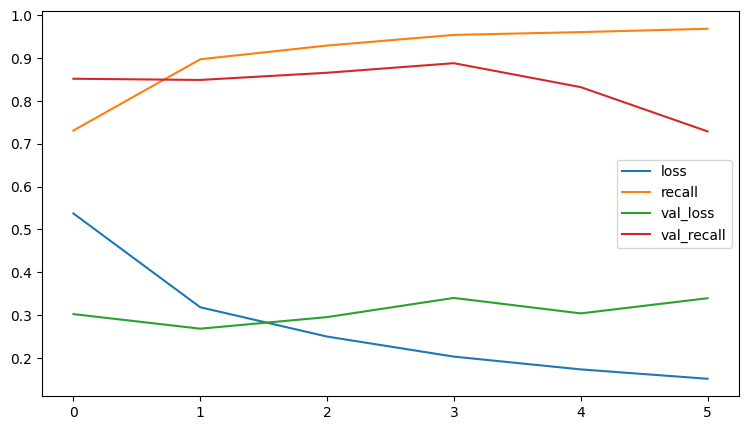

In [153]:
model_loss.plot()

In [154]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test_pad) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

62/62 [==============================] - 3s 30ms/step
[[1367  242]
 [  40  318]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1609
           1       0.57      0.89      0.69       358

    accuracy                           0.86      1967
   macro avg       0.77      0.87      0.80      1967
weighted avg       0.90      0.86      0.87      1967



In [155]:
y_train_pred = model.predict(X_train_pad) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

553/553 [==============================] - 16s 30ms/step
[[12940  1538]
 [   26  3191]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     14478
           1       0.67      0.99      0.80      3217

    accuracy                           0.91     17695
   macro avg       0.84      0.94      0.87     17695
weighted avg       0.94      0.91      0.92     17695



62/62 [==============================] - 2s 30ms/step


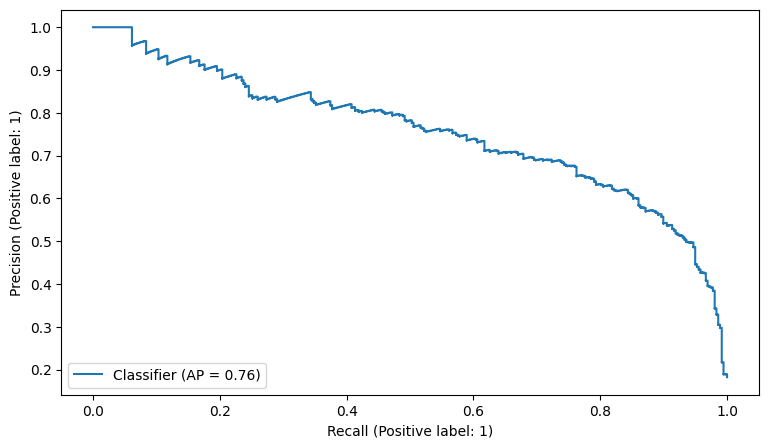

In [156]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model.predict(X_test_pad)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [157]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.7563070556794932

In [158]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [159]:
!pip install transformers

     ---------------------------------------- 8.2/8.2 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 311.7/311.7 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 277.3/277.3 kB 2.8 MB/s eta 0:00:00


### Read Data

In [160]:
# Yukarıda yapıldı

### Train test split

In [161]:
# Yukarıda yapıldı

### Tokenization

In [162]:
X_train

13613    I purchased this about a month ago and its a g...
7026     Love this so much. it is beautiful and i get t...
15484    I really wanted to like this because the color...
3322     I ordered this on line. pretty, but ran large ...
11474    This is the softest shirt, super comfy, very b...
                               ...                        
9180     When i saw this i had to have it! i was pleasa...
11613    I usually love maeve and generally feel like e...
16930    The shirt is great, aside from the fact that i...
10824    This sweater is very nice. i bought it online ...
3788     I got the blue. it is very short. one side of ...
Name: Review_Text, Length: 17695, dtype: object

In [163]:
X_test

8581     I first saw this online and was worried the de...
1807     This shirt looks and feels fabulous. i got bla...
2297     What an adorable print!  yes, it may be a bit ...
300      This elegant white lace dress attracted compli...
14144    I am 60+, in relatively decent shape, 135 lbs,...
                               ...                        
8056     This one will be going back. the color is real...
13758    The styling of this top is so cute but the fab...
18881    Love the length, color, and rise. new favorite...
19400    I discovered seea bathing suits last year and ...
14818    Love this gorgeous fox skirt. i typically wear...
Name: Review_Text, Length: 1967, dtype: object

In [164]:
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X_train:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Max sentence length:  162


In [165]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens)

1.0

In [166]:
train_sentence_tokens = tokenizer(list(X_train),
                                  max_length=162,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

In [167]:
np.array(train_sentence_tokens['input_ids'])

array([[  101,  1045,  4156, ...,     0,     0,     0],
       [  101,  2293,  2023, ...,     0,     0,     0],
       [  101,  1045,  2428, ...,     0,     0,     0],
       ...,
       [  101,  1996,  3797, ...,     0,     0,     0],
       [  101,  2023, 14329, ...,     0,     0,     0],
       [  101,  1045,  2288, ...,     0,     0,     0]])

In [168]:
np.array(train_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [169]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  sentence_tokens = tokenizer(list(X),
                              max_length=seq_len,
                              truncation=True,
                              padding='max_length',
                              add_special_tokens=True)

  return np.array(sentence_tokens['input_ids']), np.array(sentence_tokens['attention_mask'])

In [170]:
Xids_train, Xmask_train = transformation(X_train)

Xids_test, Xmask_test = transformation(X_test)

In [171]:
Xids_train

array([[  101,  1045,  4156, ...,     0,     0,     0],
       [  101,  2293,  2023, ...,     0,     0,     0],
       [  101,  1045,  2428, ...,     0,     0,     0],
       ...,
       [  101,  1996,  3797, ...,     0,     0,     0],
       [  101,  2023, 14329, ...,     0,     0,     0],
       [  101,  1045,  2288, ...,     0,     0,     0]])

In [172]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (17695, 162)
Xmask_train.shape : (17695, 162)
Xids_test.shape   : (1967, 162)
Xmask_test.shape  : (1967, 162)


In [173]:
y_train

13613    0
7026     0
15484    1
3322     0
11474    0
        ..
9180     0
11613    1
16930    0
10824    0
3788     1
Name: Recommended_IND, Length: 17695, dtype: int64

In [174]:
y_train=np.array(y_train)
y_train

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [175]:
labels_train = y_train.reshape(-1,1)
labels_train

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [176]:
y_test=np.array(y_test)
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [177]:
labels_test = y_test.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

### Fixing token counts of all documents

### Transformation Vectors to Matrices

### Transformation Matrix to Tensorflow tensor

In [178]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int32, name=None), TensorSpec(shape=(162,), dtype=tf.int32, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [179]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int32, name=None), TensorSpec(shape=(162,), dtype=tf.int32, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [180]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [181]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [182]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int32, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [183]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int32, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [184]:
batch_size = 32

# batch_size
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

In [185]:
!pip install -q tf-models-official

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [48 lines of output]
  running egg_info
  writing lib3\PyYAML.egg-info\PKG-INFO
  writing dependency_links to lib3\PyYAML.egg-info\dependency_links.txt
  writing top-level names to lib3\PyYAML.egg-info\top_level.txt
  Traceback (most recent call last):
    File "C:\Users\PC\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 351, in <module>
      main()
    File "C:\Users\PC\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 333, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
    File "C:\Users\PC\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 118, in get_requires_for_build_wheel
      return hook(config_settings)
    File "C:\Users\PC\AppData\Local\Temp\pip-build-env-ywxepb6i\overlay\Lib\site-packages\setuptools\build_meta.py", line 325, in get_require

In [196]:
pip install -U tf-models-official

  Using cached tf_models_official-2.15.0-py2.py3-none-any.whl (2.7 MB)
  Using cached sacrebleu-2.3.3-py3-none-any.whl (106 kB)
  Using cached tensorflow_datasets-4.9.3-py3-none-any.whl (5.0 MB)
  Using cached google_api_python_client-2.110.0-py2.py3-none-any.whl (12.9 MB)
  Using cached immutabledict-4.0.0-py3-none-any.whl (4.5 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached kaggle-1.5.16.tar.gz (83 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opencv_python_headless-4.8.1.78-cp37-abi3-win_amd64.whl (38.0 MB)
  Using cached tf_slim-1.1.0-py2.py3-none-any.whl (352 kB)
  Using cached Cython-3.0.6-cp310-cp310-win_amd64.whl (2.8 MB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
  Using cached seqeval-1.2.2.tar.gz (43 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached gin_config-0.5.0-py3-none-any.whl (

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [48 lines of output]
  running egg_info
  writing lib3\PyYAML.egg-info\PKG-INFO
  writing dependency_links to lib3\PyYAML.egg-info\dependency_links.txt
  writing top-level names to lib3\PyYAML.egg-info\top_level.txt
  Traceback (most recent call last):
    File "C:\Users\PC\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 351, in <module>
      main()
    File "C:\Users\PC\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 333, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
    File "C:\Users\PC\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 118, in get_requires_for_build_wheel
      return hook(config_settings)
    File "C:\Users\PC\AppData\Local\Temp\pip-build-env-to03dqk1\overlay\Lib\site-packages\setuptools\build_meta.py", line 325, in get_require

In [197]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

ModuleNotFoundError: No module named 'official'

In [198]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1106
110


### Creating optimization

### Creating Model with TPU

In [199]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [201]:
strategy = tf.distribute.TPUStrategy(resolver)

NameError: name 'resolver' is not defined

In [200]:
with strategy.scope():

  #from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall

  #optimizer = Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

NameError: name 'strategy' is not defined

In [202]:
model3.summary()

NameError: name 'model3' is not defined

In [ ]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)

### Model Fiting

### Model evaluation

In [203]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

NameError: name 'model3' is not defined

<Axes: >

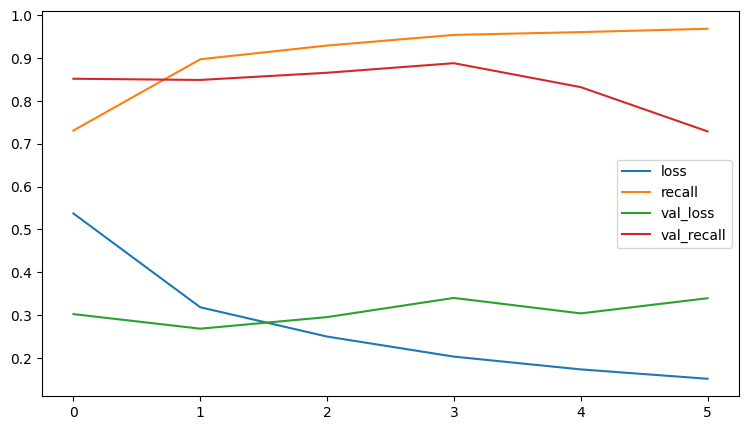

In [204]:
model_loss.plot()

In [205]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test, y_pred))

NameError: name 'model3' is not defined

In [206]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train, y_train_pred))

NameError: name 'model3' is not defined

In [207]:
y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

NameError: name 'model3' is not defined

In [208]:
average_precision_score(y_test, y_pred_proba)

0.7563070556794932

In [209]:
BERT_without_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test, y_pred)
BERT_without_weighted_rec = recall_score(y_test, y_pred)

## BERT Model with Weighted

In [210]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [211]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

ModuleNotFoundError: No module named 'official'

In [212]:
with strategy.scope():

  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall

  optimizer = optimizer #Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = BinaryCrossentropy()
  precision = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[precision])

NameError: name 'strategy' is not defined

In [213]:
pd.Series(y).value_counts(normalize=True)

0    0.818177
1    0.181823
Name: Recommended_IND, dtype: float64

In [214]:
weights = {0:0.18, 1:0.81}

In [215]:
model3.fit(
          train_ds,
          validation_data= val_ds,
          epochs=epochs,
          class_weight=weights)

NameError: name 'model3' is not defined

In [216]:
y_pred = model3.predict(val_ds) >= 0.5


print(classification_report(y_test, y_pred))

NameError: name 'model3' is not defined

In [217]:
y_train_pred = model3.predict(train_ds) >= 0.5


print(classification_report(y_train, y_train_pred))

NameError: name 'model3' is not defined

In [218]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test, y_pred_proba)

NameError: name 'model3' is not defined

In [219]:
BERT_with_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test, y_pred)
BERT_with_weighted_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

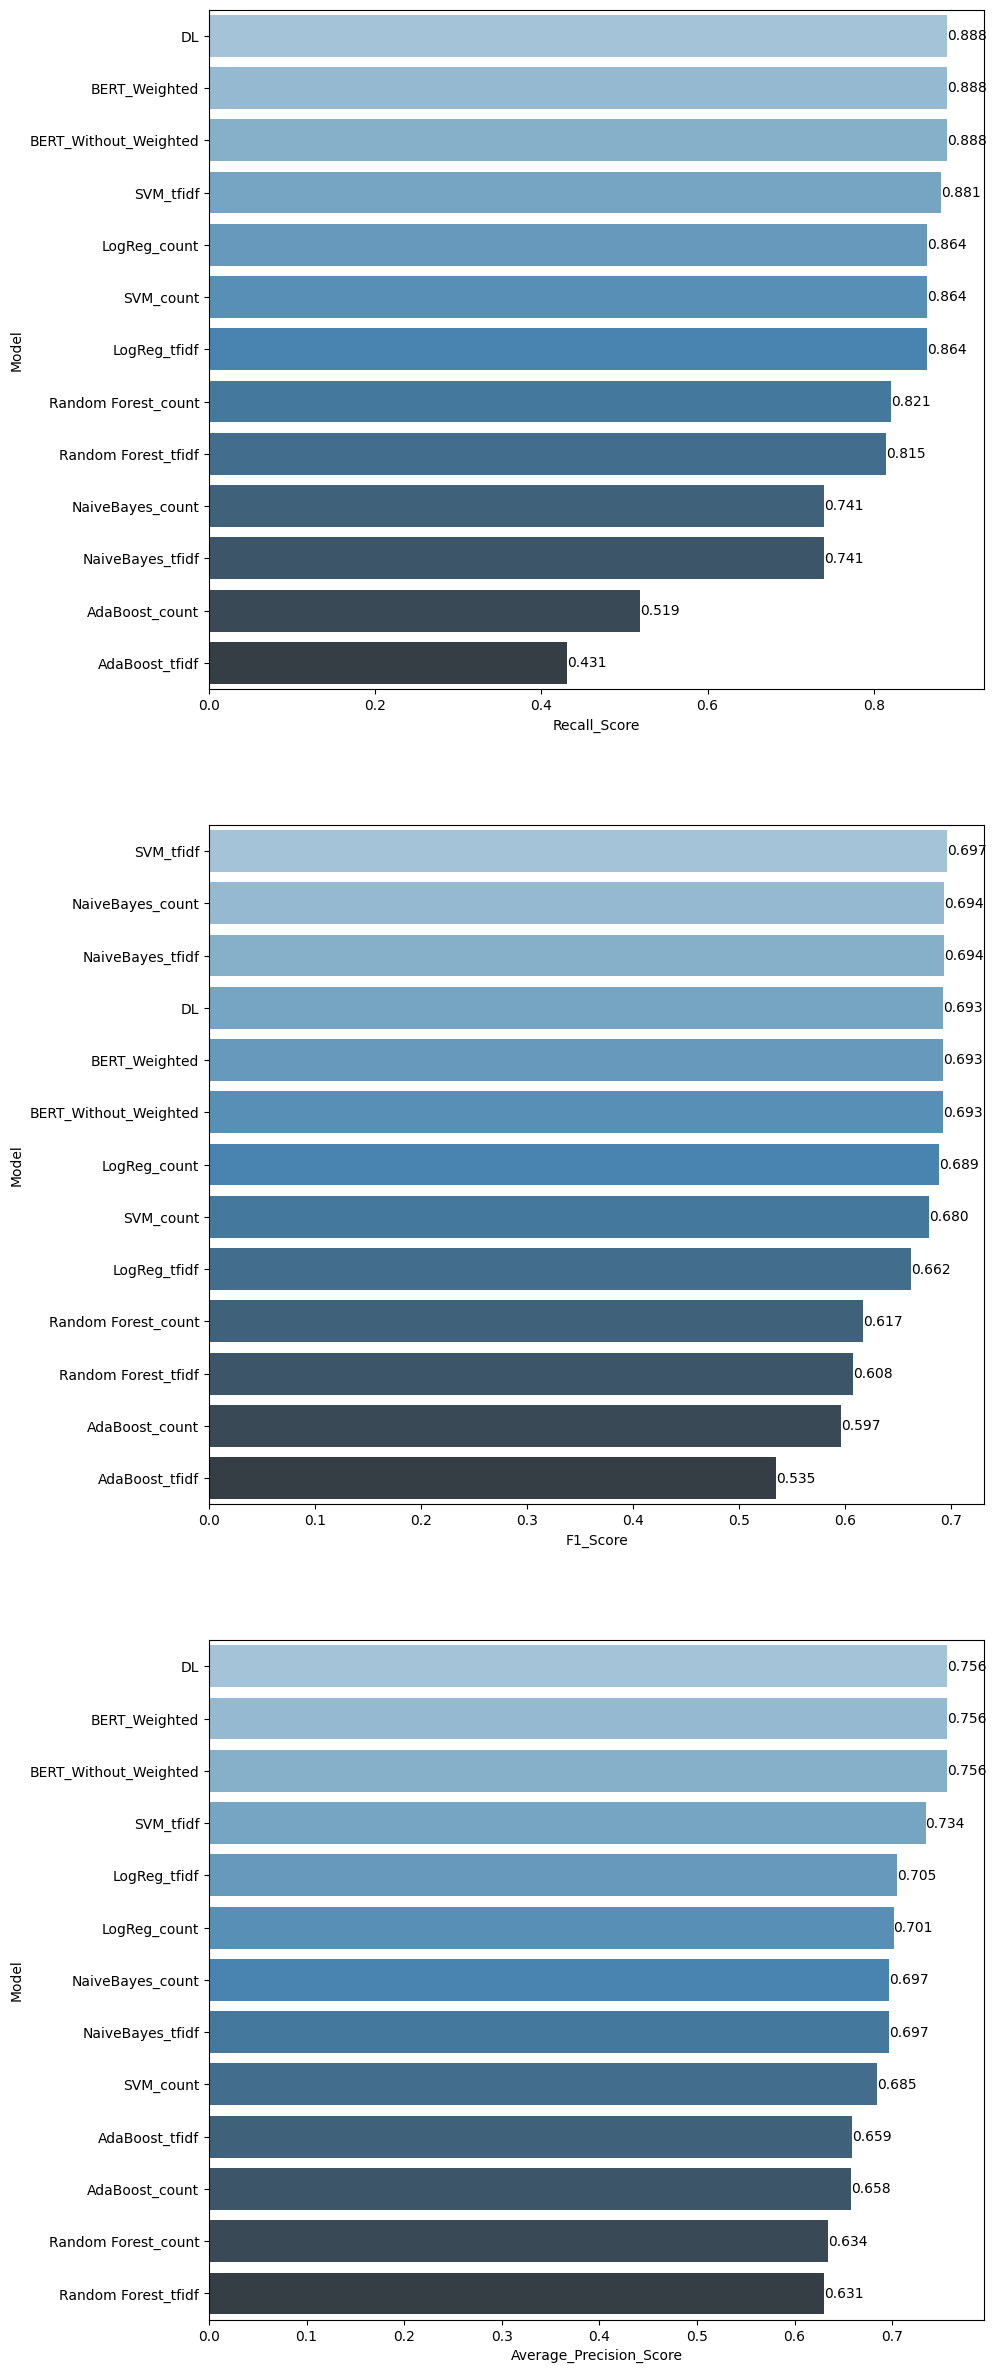

In [220]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],

                        "F1_Score": [nb_count_f1_neg, log_count_f1_neg, svc_count_f1_neg, rf_count_f1_neg, ada_count_f1_neg, nb_tfidf_f1_neg,
                                     log_tfidf_f1_neg, svc_tfidf_f1_neg, rf_tfidf_f1_neg, ada_tfidf_f1_neg, DL_f1, BERT_with_weighted_f1,
                                     BERT_without_weighted_f1],

                        "Recall_Score": [nb_count_rec_neg, log_count_rec_neg, svc_count_rec_neg, rf_count_rec_neg, ada_count_rec_neg, nb_tfidf_rec_neg,
                                         log_tfidf_rec_neg, svc_tfidf_rec_neg, rf_tfidf_rec_neg, ada_tfidf_rec_neg, DL_rec, BERT_with_weighted_rec,
                                         BERT_without_weighted_rec],

                        "Average_Precision_Score": [nb_AP_neg, log_AP_neg, svc_AP_neg, rf_AP_neg, ada_AP_neg, nb_tfidf_AP_neg,
                                                    log_tfidf_AP_neg, svc_tfidf_AP_neg, rf_tfidf_AP_neg, ada_tfidf_AP_neg, DL_AP, BERT_with_weighted_AP,
                                                    BERT_without_weighted_AP]})


plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___